<a href="https://www.kaggle.com/code/andresmartinez21/classification-cats-dogs?scriptVersionId=214221935" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Clasificación de Imagenes `Dogs`🐶 `Cats` 🐈


La clasificación de imágenes, especialmente cuando se trata de diferenciar entre perros y gatos, es un tema clásico y fascinante en visión por computadora. Esto abarca desde tareas sencillas, como entrenar un modelo básico con redes neuronales, hasta desafíos más avanzados relacionados con imágenes de baja calidad, variabilidad en las poses, razas, iluminación, etc.

### Definición del Problema

Objetivo: Diseñar un modelo de vision por computadora capaz de clasificar con exactitud imágenes de “perros” y “gatos”.
    
Salida esperada: Etiquetas binarias (0 para gatos, 1 para perros) o categóricas ('gato', 'perro').
    


### Descripcion del Dataset

El Dataset se selecciono de la plataforma kaggle ['Dog and Cat'](https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset)

El conjunto de datos contiene `24.998`imágenes, divididas en `12.499` imágenes de `gatos` y `12.499` imágenes de `perros`. Las imágenes de entrenamiento se dividen por igual, entre imágenes de gatos y perros, mientras que las imágenes de prueba no están etiquetadas. Esto permite a los usuarios evaluar sus modelos en datos no vistos.

In [1]:
# importar librerias
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
import warnings
warnings.filterwarnings('ignore')

# Preprocesado


+ Cambiaremos la dimensión de las imágenes a 128x128

+ Crearemos un dataset que contenga la ubicación de cada imagen, su categoría, dimensión de la imagen, y si será utilizado para entrenamiento o validación

In [2]:
# Rutas de entrada y salida
input_folder = '/kaggle/input/dog-and-cat-classification-dataset/PetImages'  # Carpeta con las imágenes originales
output_folder = 'proccessedImages'  # Carpeta donde guardar las imágenes redimensionadas

# Crear la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

# Tamaño deseado
target_size = (128, 128)
corrupta = 0

# Procesar imágenes de cada subcarpeta (por ejemplo, Cat y Dog)
for category in ['Cat', 'Dog']:
    input_path = os.path.join(input_folder, category)
    output_path = os.path.join(output_folder, category)

    # Crear subcarpeta para cada categoría en la carpeta de salida
    os.makedirs(output_path, exist_ok=True)

    # Iterar sobre cada archivo en la carpeta
    for filename in glob.glob(os.path.join(input_path, '*.jpg')):
        try:
            # Leer la imagen
            img = cv2.imread(filename)

            # Verificar que la imagen se cargó correctamente
            if img is not None:
                # Redimensionar la imagen al tamaño deseado
                img_resized = cv2.resize(img, target_size)

                # Generar el nombre del archivo de salida
                output_file = os.path.join(output_path, os.path.basename(filename))

                # Guardar la imagen redimensionada
                cv2.imwrite(output_file, img_resized)
                #print(f"Guardada: {output_file}")
            else:
                #print(f"Imagen corrupta o ilegible: {filename}")
                corrupta +=1

        except Exception as e:
            print(f"Error procesando {filename}: {e}")

In [3]:
corrupta

52

Contamos con 52 imagenes corruptas.

Pacemos a la creación de un dataset para cargar las imagenes por lotes

In [4]:
cat_images = glob.glob(os.path.join('/kaggle/working/proccessedImages/Cat', '*.jpg'))
cat = pd.DataFrame({
    'name':cat_images,
    'label':[1] * len(cat_images),
    'img_size':[(128,128)] * len(cat_images),
    'min_pixel':[0] * len(cat_images),
    'max_pixel':[255]* len(cat_images)
    
})
dog_images = glob.glob(os.path.join('/kaggle/working/proccessedImages/Dog', '*.jpg'))
dog = pd.DataFrame({
    'name':dog_images,
    'label':[0] * len(dog_images),
    'img_size':[(128,128)] * len(dog_images),
    'min_pixel':[0] * len(dog_images),
    'max_pixel':[255]* len(dog_images)
    
})

In [5]:
def assign_train_test(df_class, train_ratio=0.8):
    train_size = int(len(df_class) * train_ratio)  # Número de datos para entrenamiento
    df_class = df_class.sample(frac=1, random_state=42)  # Mezclar los datos y saco una muestra de 100%
    df_class['set'] = ['train'] * train_size + ['test'] * (len(df_class) - train_size)
    return df_class

# Dividir gatos y perros
cats = assign_train_test(cat)
dogs = assign_train_test(dog)


In [6]:
data = pd.concat([cats,dogs])
data = data.sample(frac=1).reset_index(drop=True) # mezclar el data set
data['label']=data['label'].map({1:'Cat',0:'Dog'},)
data.head()


,name,label,img_size,min_pixel,max_pixel,set
0,/kaggle/working/proccessedImages/Cat/4012.jpg,Cat,"(128, 128)",0,255,train
1,/kaggle/working/proccessedImages/Cat/7521.jpg,Cat,"(128, 128)",0,255,train
2,/kaggle/working/proccessedImages/Dog/7474.jpg,Dog,"(128, 128)",0,255,test
3,/kaggle/working/proccessedImages/Cat/6998.jpg,Cat,"(128, 128)",0,255,train
4,/kaggle/working/proccessedImages/Dog/9933.jpg,Dog,"(128, 128)",0,255,train


In [7]:

print('Cantidad de Categorias',data.label.value_counts(),end='\n')
print('Cantidad de ',data.set.value_counts(),end='\n')


Cantidad de Categorias label
Cat    12476
Dog    12470
Name: count, dtype: int64
Cantidad de  set
train    19956
test      4990
Name: count, dtype: int64


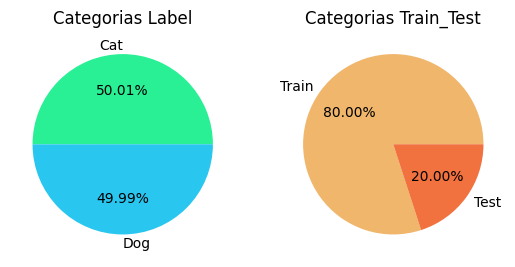

In [8]:

plt.subplot(1,2,1)
options = ["Cat", "Dog"]
count = [data.label.value_counts()[0],data.label.value_counts()[1]]

plt.pie(count, colors = ["#29F095", "#29C6F0"], labels = options, autopct = "%0.2f%%")
plt.title("Categorias Label")

plt.subplot(1,2,2)
options = ["Train", "Test"]
count = [data.set.value_counts()[0],data.set.value_counts()[1]]

plt.pie(count, colors = ["#F0B66B", "#F1713F"], labels = options, autopct = "%0.2f%%")
plt.title("Categorias Train_Test")
plt.show()

In [9]:
sample_files = data[['name', 'label']].sample(16, random_state=21)


random_files = []

for file in sample_files.iterrows():
    file_path, label  = os.path.join(file[1][0]), file[1][1]
    random_files = random_files + [(file_path, label)]

In [10]:
from PIL import Image
def display_images(random_files):

    N  = len(random_files)
    if N > 16:
        raise ValueError("N should be 16 or less to fit in a 6x6 grid.")
        
    # Set up the plot
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.flatten()

    # Hide any extra subplots
    for ax in axes[N:]:
        ax.axis('off')

    # Display each image
    for ax, image in zip(axes, random_files):
        image_path = image[0]
        label = image[1]
        
        img = Image.open(image_path)
        ax.imshow(img)
        ax.set_title(label, fontsize=8)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

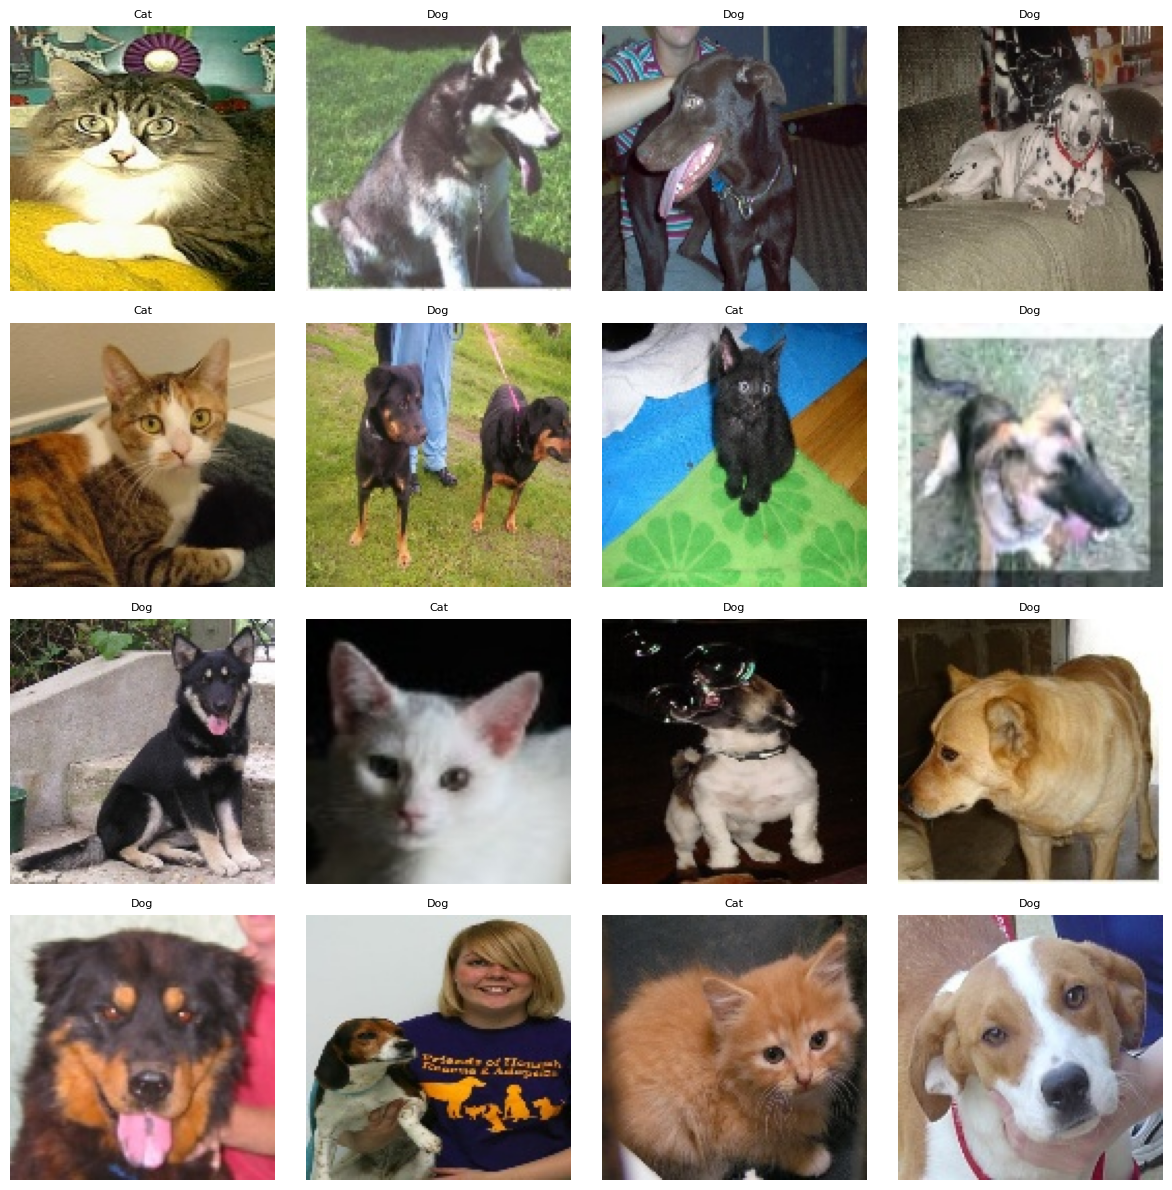

In [11]:
display_images(random_files)

### Observaciones
+ La variablilida de las fotos tanto en los pixeles, el color o la posicion de los animales prodia dificultar el entrenamiento del modelos.
+ Ademas tenemos animales donde No se puede ver todo el cuerpo ya sea por el enfoque de la fotografia o por interaccion con personas u objetos.


# Modelado CNN


In [12]:
# data handling
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt

# machine learning
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# neural networks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
import tensorflow as tf
from keras.regularizers import L2
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.legacy import Adam


import random
import itertools

warnings.filterwarnings('ignore')

## Carga de Datos mediante lotes
Para la cargar los datos de manera eficiente utilizaremos una herramienta de DataLoader carga de datos en lotes (batches) para alimentar a la red neuronal.

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
batch_size = 36 # numero de imagenes procesadas por lote
image_size = 128 # tamaño de imagenes
channels = 3 # canales RGB

### Division de datos `Train` `Test`

In [15]:
# division de datos en 
X_train = data[data['set']=='train'][['name', 'label']]
X_test = data[data['set']=='test'][['name', 'label']]

In [16]:
X_train, X_val = train_test_split(X_train, test_size=0.2, stratify=X_train['label'], random_state=21)

In [17]:
# Vamos a leer los datos por lotes 
train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory = None,
                                                    x_col= 'name',
                                                    y_col= 'label',	
                                                    class_mode='binary',
                                                    batch_size = batch_size,
                                                    target_size = (image_size,image_size))

val_generator = test_datagen.flow_from_dataframe(X_val,
                                                 directory = None,
                                                 x_col= 'name',
                                                 y_col= 'label',
                                                 class_mode='binary',
                                                 batch_size = batch_size,
                                                 target_size = (image_size,image_size),
                                                 shuffle=False
                                                 )

test_generator = test_datagen.flow_from_dataframe(X_test,
                                                  directory = None,
                                                  x_col= 'name',
                                                  y_col= 'label',
                                                  class_mode='binary',
                                                  batch_size = batch_size,
                                                  target_size = (image_size,image_size),
                                                  shuffle=False
                                                 )

Found 15964 validated image filenames belonging to 2 classes.
Found 3992 validated image filenames belonging to 2 classes.
Found 4990 validated image filenames belonging to 2 classes.


### Utilidades para Validación 


In [18]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_history(history):
    # Extract data from the history object
    history_dict = history.history
    
    # Extract metrics from history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    accuracy = history_dict.get('accuracy')
    val_accuracy = history_dict.get('val_accuracy')
    
    epochs = range(1, len(loss) + 1)
    
    # Plot training and validation loss
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [19]:
np.random.seed(21)

## Arquitectura del Modelo

In [20]:
modelo=Sequential()
modelo.add(Conv2D(32, (3,3),input_shape=(128,128,3),activation='relu'))
modelo.add(MaxPooling2D(pool_size=((2,2))))
modelo.add(Flatten())
modelo.add(Dense(128,activation='relu')) # capa de entrada
modelo.add(Dense(50,activation='relu')) 
modelo.add(Dense(1,activation='sigmoid')) # capa de salida
modelo.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Usar la versión legacy del optimizador
    metrics=['accuracy']
)


In [21]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,257,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,264,549 (62.04 MB)

 Trainable params: 16,264,549 (62.04 MB)

 Non-trainable params: 0 (0.00 B)

### callback EarlyStopping
para penalisar el entrenamiento

In [22]:
## callback para penalisar el entrenamiento 
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

## Entrenamiento

In [23]:
history = modelo.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=callbacks,
                    epochs = 20
                   )

Epoch 1/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.5844 - loss: 1.2043 - val_accuracy: 0.6698 - val_loss: 0.5951
Epoch 2/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.7623 - loss: 0.5028 - val_accuracy: 0.7380 - val_loss: 0.5440
Epoch 3/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8268 - loss: 0.3819 - val_accuracy: 0.7412 - val_loss: 0.5881
Epoch 4/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.8949 - loss: 0.2454 - val_accuracy: 0.7422 - val_loss: 0.7307
Epoch 5/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9511 - loss: 0.1321 - val_accuracy: 0.7385 - val_loss: 0.8859
Epoch 6/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9667 - loss: 0.0948 - val_accuracy: 0.7262 - val_loss: 1.0205
Epoch 7/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9792 - loss: 0.0636 - val_accuracy: 0.7224 - val_loss: 1.3688
Epoch 8/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9878 - loss: 0.0395 - 

## Validacion

In [24]:
result = modelo.predict(test_generator, batch_size = batch_size,verbose = 1)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2496
           1       0.00      0.00      0.00      2494

    accuracy                           0.50      4990
   macro avg       0.25      0.50      0.33      4990
weighted avg       0.25      0.50      0.33      4990

Confusion matrix, without normalization


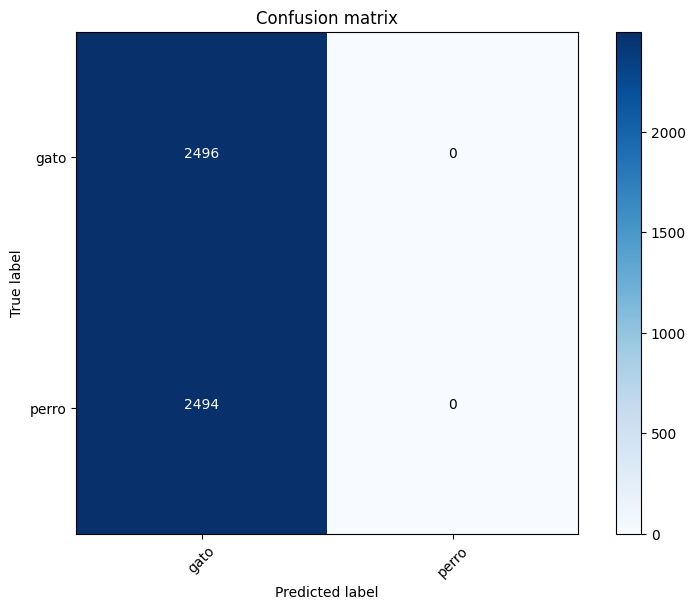

In [25]:
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, ['gato','perro'])

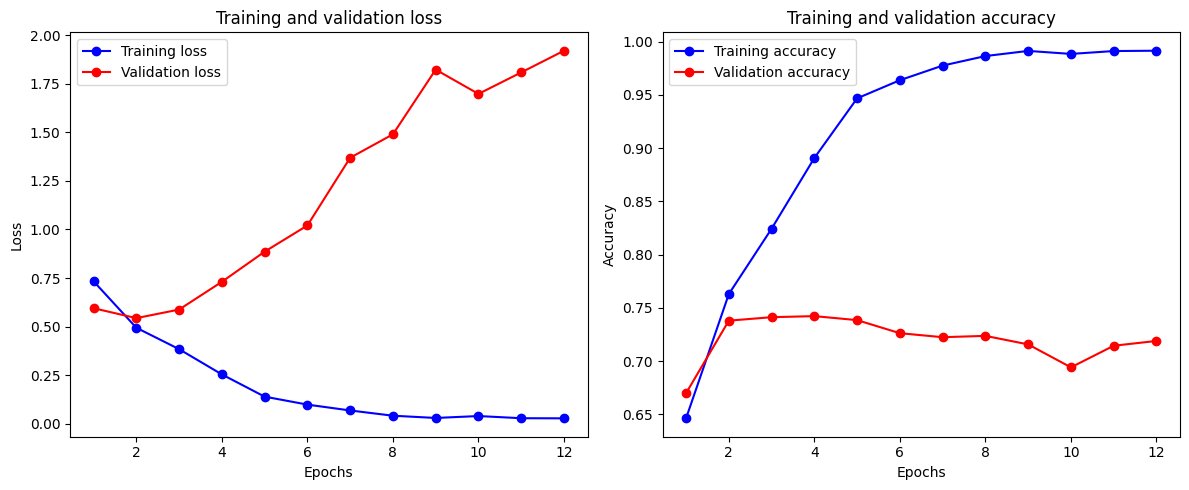

In [26]:
plot_history(history)

En las curvas de entrenamiento se evidencia un sobreentrenamiento `Overfiting` 

Optare por aplicar tecnicas de regularización como kernel_regularizer `L2`, `Dropount` y `BatchNormalization`.

## #1.1 Modelo CNN

In [27]:
modelo2=Sequential()
modelo2.add(Conv2D(32, (3,3),input_shape=(128,128,3),activation='relu',kernel_regularizer=L2(0.01)))
modelo2.add(BatchNormalization()) 
modelo2.add(MaxPooling2D(pool_size=((2,2))))
modelo2.add(Flatten())
modelo2.add(Dropout(0.2))
modelo2.add(Dense(50,activation='relu')) 
modelo2.add(Dense(1,activation='sigmoid')) # capa de salida
modelo2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  
    metrics=['accuracy']
)

In [28]:
modelo2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │       6,350,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,351,525 (24.23 MB)

 Trainable params: 6,351,461 (24.23 MB)

 Non-trainable params: 64 (256.00 B)

In [29]:
history2 = modelo2.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=callbacks,
                    epochs = 20
                   )

Epoch 1/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5311 - loss: 1.5632 - val_accuracy: 0.6631 - val_loss: 0.6922
Epoch 2/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.6759 - loss: 0.7457 - val_accuracy: 0.7017 - val_loss: 0.6439
Epoch 3/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.7460 - loss: 0.6010 - val_accuracy: 0.7027 - val_loss: 0.6302
Epoch 4/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7700 - loss: 0.5485 - val_accuracy: 0.6854 - val_loss: 0.6750
Epoch 5/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.8225 - loss: 0.4764 - val_accuracy: 0.7227 - val_loss: 0.6194
Epoch 6/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.8580 - loss: 0.4078 - val_accuracy: 0.7222 - val_loss: 0.6926
Epoch 7/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8809 - loss: 0.3592 - val_accuracy: 0.7204 - val_loss: 0.7017
Epoch 8/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9085 - loss: 0.3000 - 

In [30]:
result2 = modelo2.predict(test_generator, batch_size = batch_size,verbose = 0)

y_pred2 = np.argmax(result2, axis = 1)

y_true2 = test_generator.labels

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2496
           1       0.00      0.00      0.00      2494

    accuracy                           0.50      4990
   macro avg       0.25      0.50      0.33      4990
weighted avg       0.25      0.50      0.33      4990

Confusion matrix, without normalization


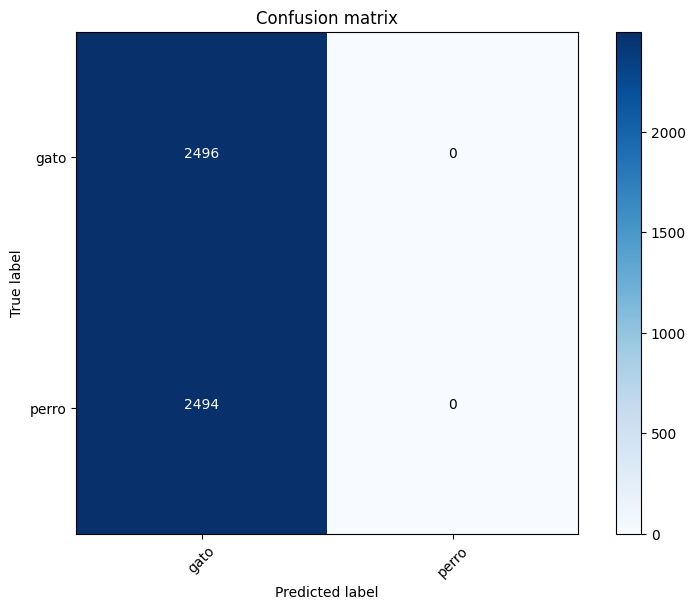

In [31]:
print(classification_report(y_true2, y_pred2))
cm = confusion_matrix(y_true2, y_pred2)
plot_confusion_matrix(cm, ['gato','perro'])

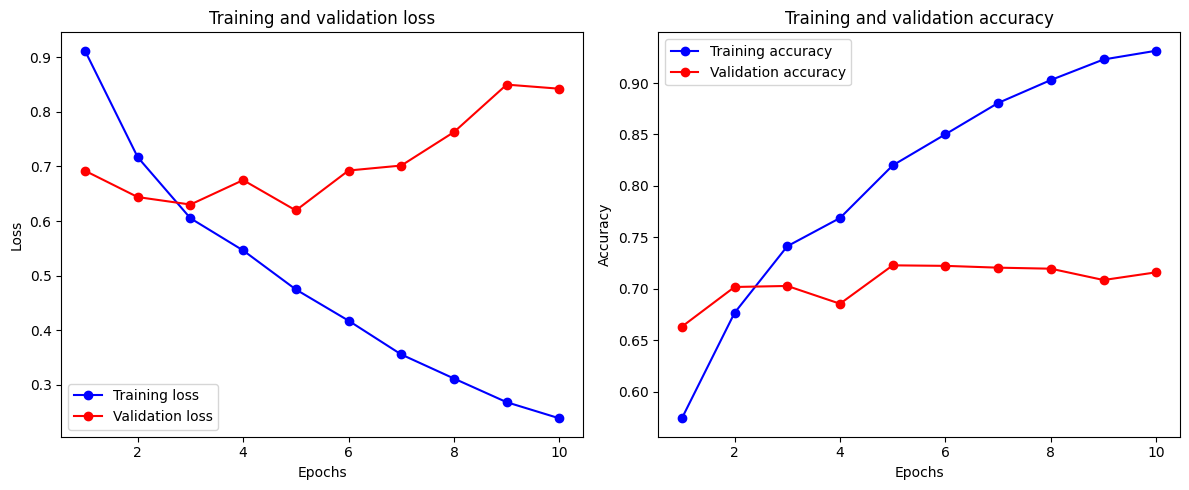

In [32]:
plot_history(history2)

Ahora probemos con mas capas de convolucion

## #2 Modelo CNN

In [33]:
model1 = Sequential()
model1.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model1.add(MaxPooling2D(2,2))

model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))

model1.add(Conv2D(128, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))


model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Usar la versión legacy del optimizador
    metrics=['accuracy']
)

In [34]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,329 (49.36 MB)

 Trainable params: 12,939,329 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history1 = model1.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=callbacks,
                    epochs = 20
                   )

Epoch 1/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.5340 - loss: 0.7389 - val_accuracy: 0.6741 - val_loss: 0.5950
Epoch 2/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7135 - loss: 0.5523 - val_accuracy: 0.7640 - val_loss: 0.5023
Epoch 3/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7900 - loss: 0.4378 - val_accuracy: 0.7951 - val_loss: 0.4548
Epoch 4/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8433 - loss: 0.3565 - val_accuracy: 0.8091 - val_loss: 0.4201
Epoch 5/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8848 - loss: 0.2762 - val_accuracy: 0.8131 - val_loss: 0.4536
Epoch 6/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9301 - loss: 0.1723 - val_accuracy: 0.8126 - val_loss: 0.5164
Epoch 7/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9644 - loss: 0.0979 - val_accuracy: 0.8151 - val_loss: 0.6146
Epoch 8/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9871 - loss: 0.0406 - 

In [36]:
result = model1.predict(test_generator, batch_size = batch_size,verbose = 1)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2496
           1       0.00      0.00      0.00      2494

    accuracy                           0.50      4990
   macro avg       0.25      0.50      0.33      4990
weighted avg       0.25      0.50      0.33      4990

Confusion matrix, without normalization


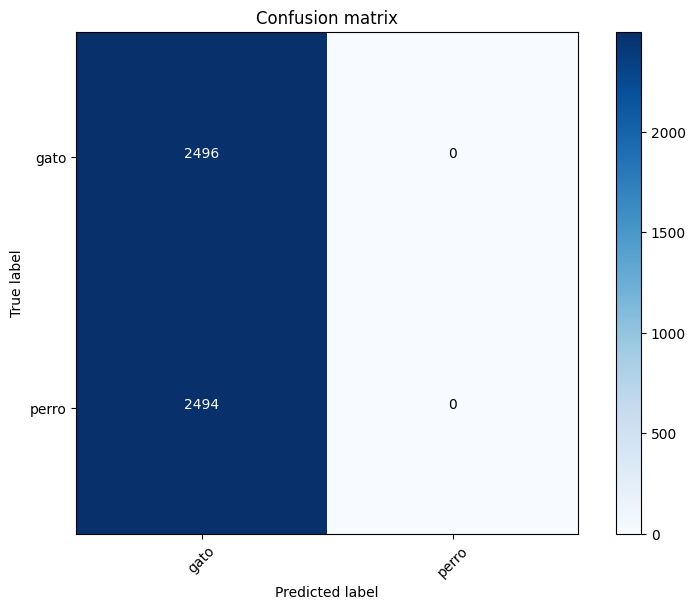

In [37]:
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, ['gato','perro'])

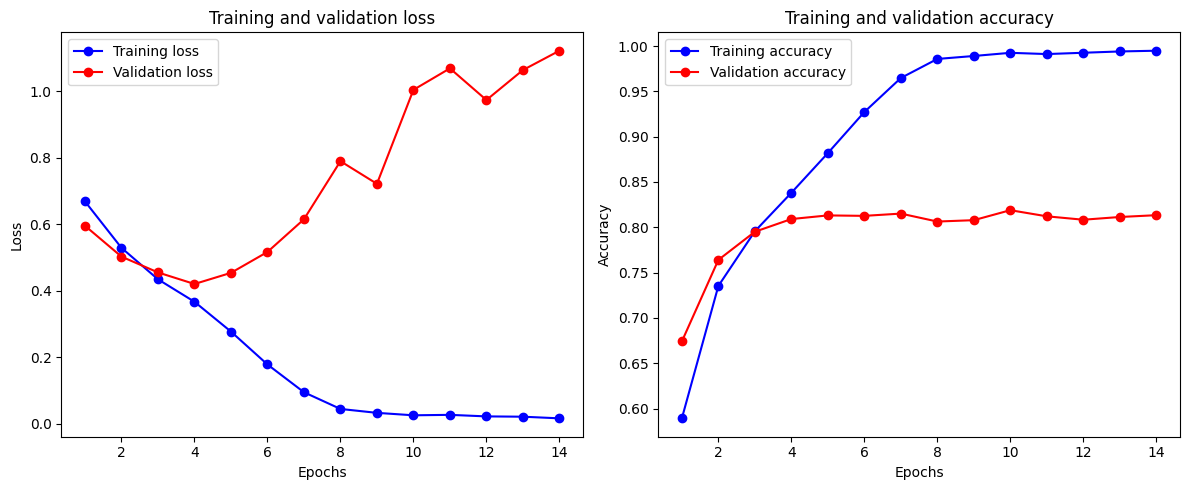

In [38]:
plot_history(history1)

tenemo nuevamente ... 


## #2.1 modelo CNN

In [39]:
model11 = Sequential()
model11.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3),kernel_regularizer=L2(0.01)))
model11.add(MaxPooling2D(2,2))
model11.add(Dropout(0.2))
model11.add(Conv2D(64, (3,3), activation='relu',))
model11.add(MaxPooling2D(2,2))
model11.add(Dropout(0.2))
model11.add(Conv2D(128, (3,3), activation='relu',kernel_regularizer=L2(0.01)))
model11.add(MaxPooling2D(2,2))
model11.add(Dropout(0.2))
model11.add(Flatten())

model11.add(Dense(1, activation='sigmoid'))
model11.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Usar la versión legacy del optimizador
    metrics=['accuracy'])

In [40]:
history11 = model11.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=callbacks,
                    epochs = 20
                   )

Epoch 1/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.5354 - loss: 0.8964 - val_accuracy: 0.5882 - val_loss: 0.6817
Epoch 2/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.5899 - loss: 0.6766 - val_accuracy: 0.6240 - val_loss: 0.6463
Epoch 3/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.6410 - loss: 0.6352 - val_accuracy: 0.6748 - val_loss: 0.6167
Epoch 4/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.6866 - loss: 0.5995 - val_accuracy: 0.6924 - val_loss: 0.6038
Epoch 5/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7104 - loss: 0.5785 - val_accuracy: 0.7219 - val_loss: 0.5694
Epoch 6/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7112 - loss: 0.5720 - val_accuracy: 0.7204 - val_loss: 0.5686
Epoch 7/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7228 - loss: 0.5607 - val_accuracy: 0.7255 - val_loss: 0.5746
Epoch 8/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7324 - loss: 0.5539 - 

In [41]:
result = model11.predict(test_generator, batch_size = batch_size,verbose = 1)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2496
           1       0.00      0.00      0.00      2494

    accuracy                           0.50      4990
   macro avg       0.25      0.50      0.33      4990
weighted avg       0.25      0.50      0.33      4990

Confusion matrix, without normalization


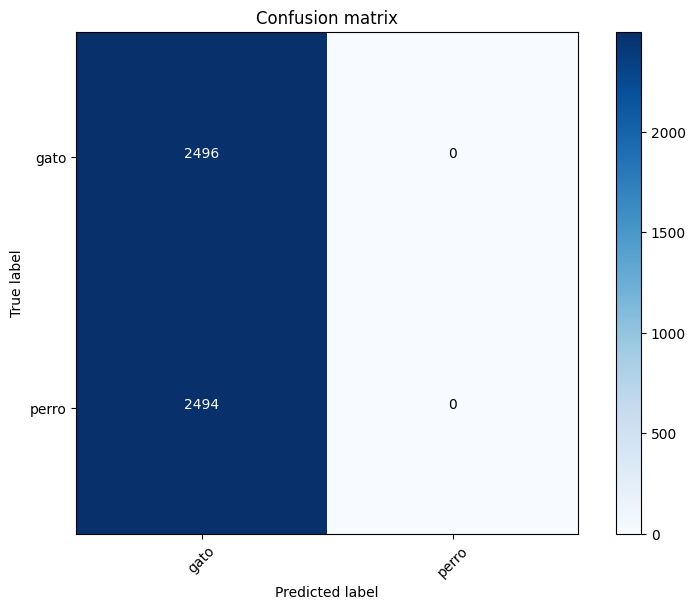

In [42]:
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, ['gato','perro'])

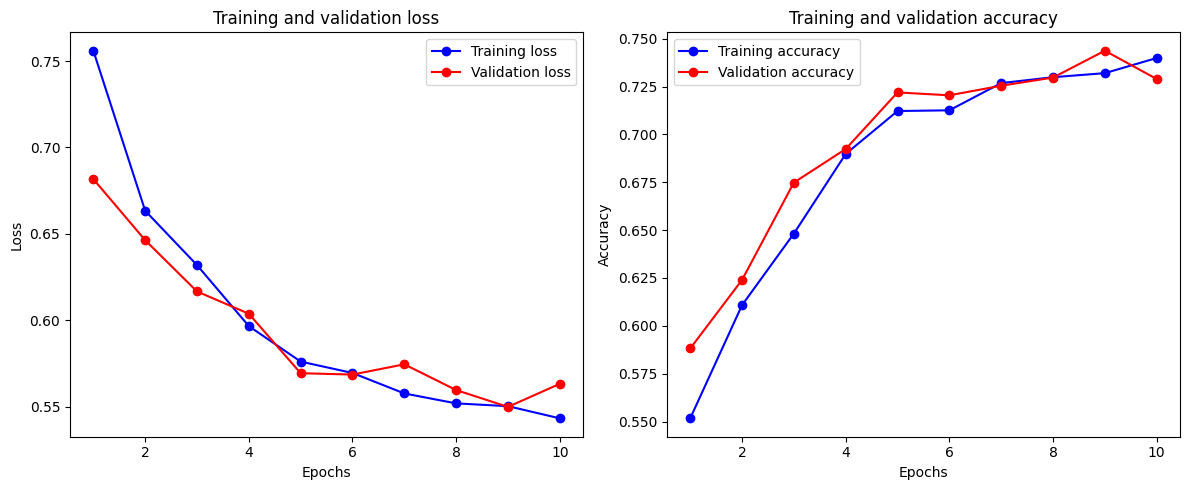

In [43]:
plot_history(history11)

## 2.2 Modelo CNN

Agregando una capa de `BatchNormalization` y una capa `densa`. 

Aumentamos las epocas a 100

In [44]:
model12 = Sequential()
model12.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3),kernel_regularizer=L2(0.01)))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(2,2))
model12.add(Dropout(0.2))

model12.add(Conv2D(64, (3,3), activation='relu',))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(2,2))
model12.add(Dropout(0.2))

model12.add(Conv2D(128, (3,3), activation='relu',kernel_regularizer=L2(0.01)))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(2,2))
model12.add(Dropout(0.2))
model12.add(Flatten())

model12.add(Dense(64,activation='relu'))
model12.add(BatchNormalization())
model12.add(Dense(1, activation='sigmoid'))
model12.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Usar la versión legacy del optimizador
    metrics=['accuracy'])

In [45]:
model12.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,700,161 (6.49 MB)

 Trainable params: 1,699,585 (6.48 MB)

 Non-trainable params: 576 (2.25 KB)

In [46]:
history12 = model12.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=callbacks,
                    epochs = 100
                   )

Epoch 1/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6503 - loss: 1.2967 - val_accuracy: 0.5000 - val_loss: 1.2467
Epoch 2/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.7615 - loss: 0.5846 - val_accuracy: 0.6410 - val_loss: 0.7659
Epoch 3/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8109 - loss: 0.4921 - val_accuracy: 0.7335 - val_loss: 0.6674
Epoch 4/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8327 - loss: 0.4653 - val_accuracy: 0.6851 - val_loss: 0.7603
Epoch 5/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8550 - loss: 0.4396 - val_accuracy: 0.8051 - val_loss: 0.5438
Epoch 6/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8732 - loss: 0.4152 - val_accuracy: 0.6941 - val_loss: 0.8048
Epoch 7/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.8910 - loss: 0.3784 - val_accuracy: 0.7961 - val_loss: 0.5758
Epoch 8/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9018 - loss: 0

In [47]:
result = model12.predict(test_generator, batch_size = batch_size,verbose = 1)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2496
           1       0.00      0.00      0.00      2494

    accuracy                           0.50      4990
   macro avg       0.25      0.50      0.33      4990
weighted avg       0.25      0.50      0.33      4990

Confusion matrix, without normalization


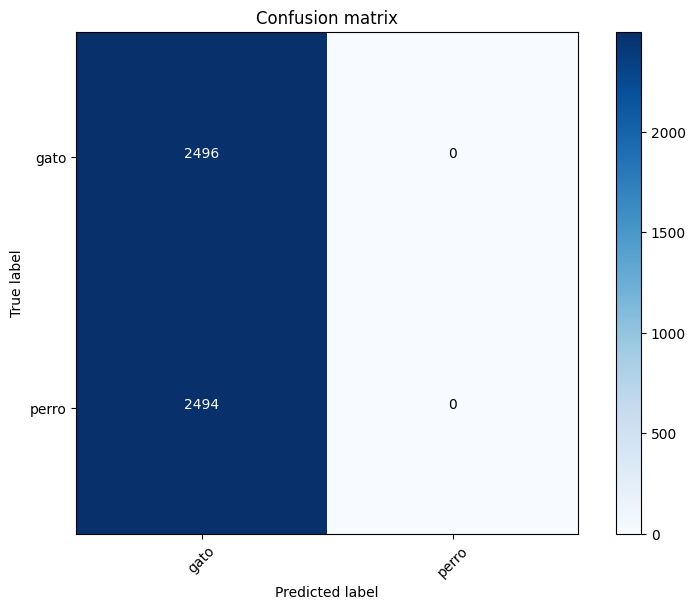

In [48]:
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, ['gato','perro'])

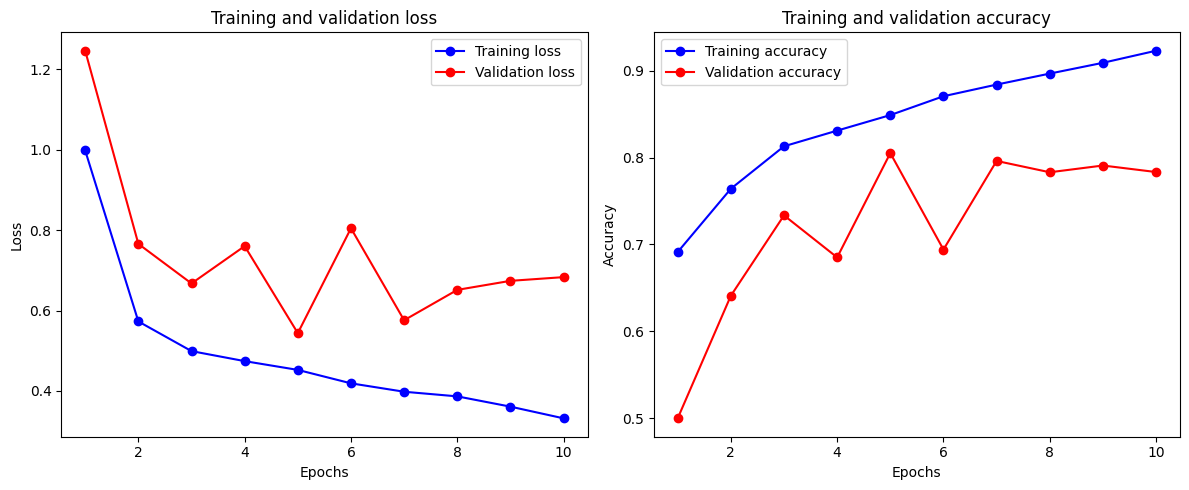

In [49]:
plot_history(history12)

Aumentemos la profundidad de la Red 

Dado que tenemos mucho ruido en las curvas de entrenamiento optaremos, por utilizar el colllbacks `ReduceLROnPlateau` este reducir la tasa de aprendizaje cuando la métrica monitoreada (en este caso, val_loss) se detiene o deja de mejorar. Esto permite al modelo realizar ajustes más finos en los pesos y puede ayudarlo a superar un estancamiento en el entrenamiento.

In [50]:
model12 = Sequential()
model12.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3),kernel_regularizer=L2(0.01)))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(2,2))
model12.add(Dropout(0.2))

model12.add(Conv2D(64, (3,3), activation='relu',))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(2,2))
model12.add(Dropout(0.2))

model12.add(Conv2D(128, (3,3), activation='relu',kernel_regularizer=L2(0.01)))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(2,2))
model12.add(Dropout(0.2))


model12.add(Conv2D(256, (3,3), activation='relu',kernel_regularizer=L2(0.01)))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(2,2))
model12.add(Dropout(0.2))
model12.add(Flatten())

model12.add(Dense(64,activation='relu'))
model12.add(BatchNormalization())
model12.add(Dense(1, activation='sigmoid'))
model12.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Usar la versión legacy del optimizador
    metrics=['accuracy'])

In [51]:
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

In [52]:
history12 = model12.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=callbacks,
                    epochs = 100
                   )

Epoch 1/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.6554 - loss: 2.4180 - val_accuracy: 0.5015 - val_loss: 1.2871 - learning_rate: 0.0010
Epoch 2/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.7620 - loss: 0.7072 - val_accuracy: 0.7708 - val_loss: 0.6707 - learning_rate: 0.0010
Epoch 3/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.7972 - loss: 0.6326 - val_accuracy: 0.7089 - val_loss: 0.8547 - learning_rate: 0.0010
Epoch 4/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8118 - loss: 0.6591 - val_accuracy: 0.6794 - val_loss: 0.8471 - learning_rate: 0.0010
Epoch 5/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.8308 - loss: 0.6101 - val_accuracy: 0.7072 - val_loss: 0.7998 - learning_rate: 0.0010
Epoch 6/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8461 - loss: 0.5752 - val_accuracy: 0.6743 - val_loss: 0.8301 - learning_rate: 0.0010
Epoch 7/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.8

In [53]:
result = model12.predict(test_generator, batch_size = batch_size,verbose = 1)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


In [54]:
history12 = model12.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=callbacks,
                    epochs = 100
                   )

Epoch 1/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9958 - loss: 0.0957 - val_accuracy: 0.9364 - val_loss: 0.2643 - learning_rate: 6.4000e-08
Epoch 2/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9949 - loss: 0.0990 - val_accuracy: 0.9379 - val_loss: 0.2607 - learning_rate: 6.4000e-08
Epoch 3/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9926 - loss: 0.0995 - val_accuracy: 0.9374 - val_loss: 0.2570 - learning_rate: 6.4000e-08
Epoch 4/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9954 - loss: 0.0973 - val_accuracy: 0.9374 - val_loss: 0.2600 - learning_rate: 6.4000e-08
Epoch 5/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9936 - loss: 0.0998 - val_accuracy: 0.9371 - val_loss: 0.2622 - learning_rate: 6.4000e-08
Epoch 6/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9944 - loss: 0.0972 - val_accuracy: 0.9374 - val_loss: 0.2615 - learning_rate: 6.4000e-08
Epoch 7/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 2

In [55]:
result = model12.predict(test_generator, batch_size = batch_size,verbose = 1)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2496
           1       0.00      0.00      0.00      2494

    accuracy                           0.50      4990
   macro avg       0.25      0.50      0.33      4990
weighted avg       0.25      0.50      0.33      4990

Confusion matrix, without normalization


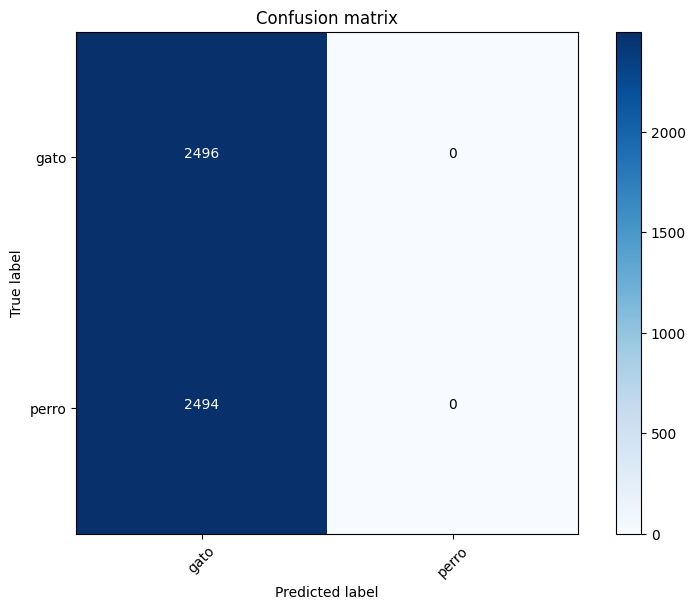

In [56]:
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, ['gato','perro'])

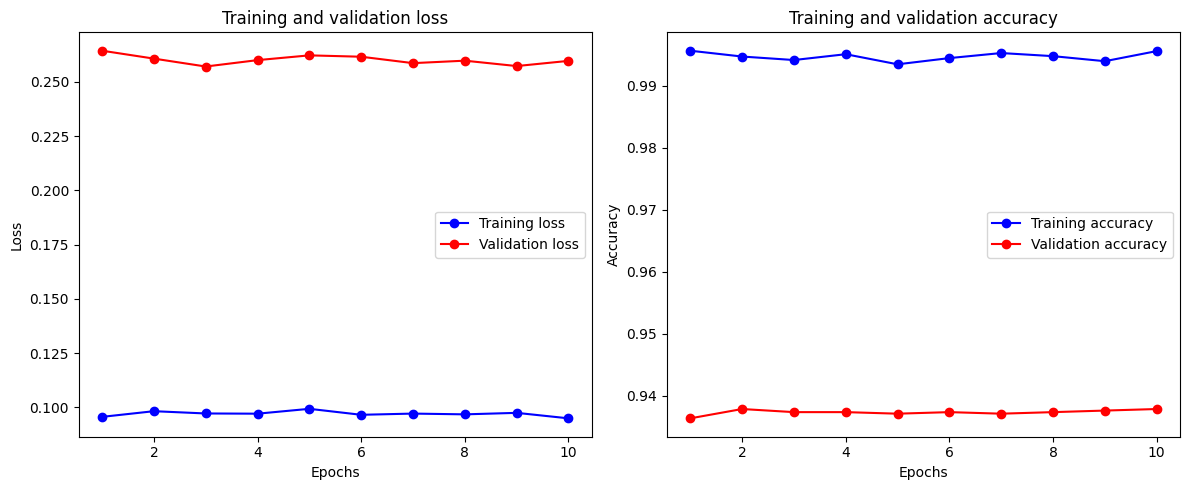

In [57]:
plot_history(history12)

### Conclusiones 

+ 


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


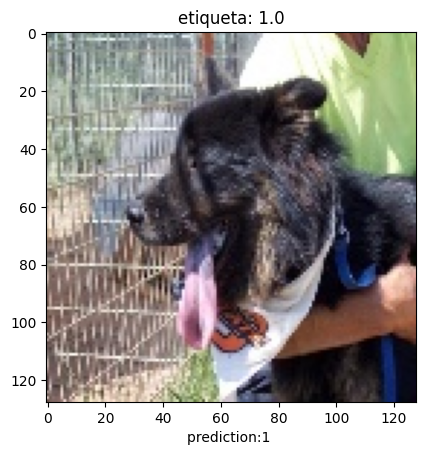

In [58]:
imagine,lab=next(test_generator)
image_batch = np.expand_dims(imagine[0], axis=0) # agrego una nueva dimensión 
img_pred=int(np.round( model12.predict(image_batch))) #
img = imagine[0] * 255  # Escalar a 0-255
plt.imshow(img.astype(np.uint8))
plt.title('etiqueta: {}'.format(lab[0]))
plt.xlabel('prediction:{} '.format(img_pred))
plt.show()